In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('troop_movements.csv')
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-05-21 11:50:49,1,at-st,resistance,6,10,7,4,Zolan
1,2024-05-21 11:50:48,2,at-at,empire,10,1,10,5,Iktotch
2,2024-05-21 11:50:47,3,at-st,resistance,7,10,7,6,Concord Dawn
3,2024-05-21 11:50:46,4,stormtrooper,empire,2,7,9,6,Alderaan
4,2024-05-21 11:50:45,5,x-wing,resistance,10,5,8,6,Kashyyyk


In [22]:
# Create grouped data showing counts of empire vs resistance.
df_empire_or_resistance = df.groupby('empire_or_resistance').count()
df_empire_or_resistance

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
empire_or_resistance,,,,,,,,
empire,508,508,508,508,508,508,508,508
resistance,492,492,492,492,492,492,492,492


In [28]:
df_homeworld = df.groupby(['homeworld']).count()
df_homeworld

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,is_resistance
homeworld,,,,,,,,,
Alderaan,17,17,17,17,17,17,17,17,17
Aleen Minor,29,29,29,29,29,29,29,29,29
Bestine IV,23,23,23,23,23,23,23,23,23
Cerea,19,19,19,19,19,19,19,19,19
Champala,20,20,20,20,20,20,20,20,20
Chandrila,19,19,19,19,19,19,19,19,19
Concord Dawn,20,20,20,20,20,20,20,20,20
Corellia,17,17,17,17,17,17,17,17,17
Dagobah,27,27,27,27,27,27,27,27,27


In [24]:
df_unit_type = df.groupby('unit_type').count()
df_unit_type

,timestamp,unit_id,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
unit_type,,,,,,,,
at-at,142,142,142,142,142,142,142,142
at-st,137,137,137,137,137,137,137,137
resistance_soldier,122,122,122,122,122,122,122,122
stormtrooper,127,127,127,127,127,127,127,127
tie_fighter,129,129,129,129,129,129,129,129
tie_silencer,123,123,123,123,123,123,123,123
unknown,119,119,119,119,119,119,119,119
x-wing,101,101,101,101,101,101,101,101


In [25]:
df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: True if x == "resistance" else False)
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-05-21 11:50:49,1,at-st,resistance,6,10,7,4,Zolan,True
1,2024-05-21 11:50:48,2,at-at,empire,10,1,10,5,Iktotch,False
2,2024-05-21 11:50:47,3,at-st,resistance,7,10,7,6,Concord Dawn,True
3,2024-05-21 11:50:46,4,stormtrooper,empire,2,7,9,6,Alderaan,False
4,2024-05-21 11:50:45,5,x-wing,resistance,10,5,8,6,Kashyyyk,True


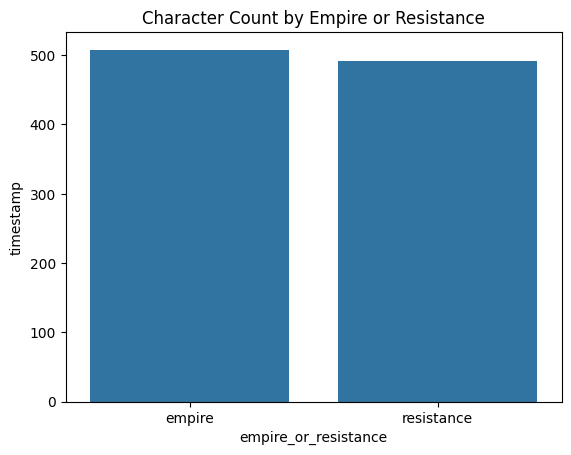

In [31]:
sns.barplot(x="empire_or_resistance", y="timestamp", data=df_empire_or_resistance)
plt.title("Character Count by Empire or Resistance")
plt.show()